In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import warnings

from simulator import Simulation

warnings.simplefilter(action='ignore', category=UserWarning)

In [2]:
def plot_distribution(project_df):    
    fig, ax = plt.subplots(figsize=(15,5))
    project_df['token_amount'].plot(kind='bar', width=1, ax=ax)
    ax.set_xticks([])
    ax.set_xlabel("")
    ax.set_ylabel("Tokens")
    fig.show()
    
    
def plot_alignment(project_df):    
    fig, ax = plt.subplots(figsize=(15,5))
    project_df.plot(kind='scatter', x='rating', y='token_amount', ax=ax)
    ax.set_ylabel("Tokens")
    ax.set_xlabel("Impact")
    ax.set_xticks([])    
    fig.show()
    
    
def analyze_simulation(sim, **kwargs):
    results = sim.allocate_votes(**kwargs)
    print(pd.Series(results))
    data = sim.get_project_data()
    project_df = pd.DataFrame(data).sort_values(by='token_amount', ascending=False)
    plot_distribution(project_df)    
    plot_alignment(project_df)

# Base Model

In [3]:
simulation = Simulation()

simulation.initialize_round(30_000_000)
simulation.randomize_voters(
    num_voters=150, 
    willingness_to_spend=1.0, 
    laziness_factor=0.5, 
    expertise_factor=0.5
)
simulation.randomize_projects(643)
simulation.simulate_voting()

scoring_method                     median
vote_quorum                            17
min_amount                           1500
num_projects_above_quorum             471
avg_payout                   63694.267431
median_payout                     32963.2
max_payout                      429316.13
dtype: object


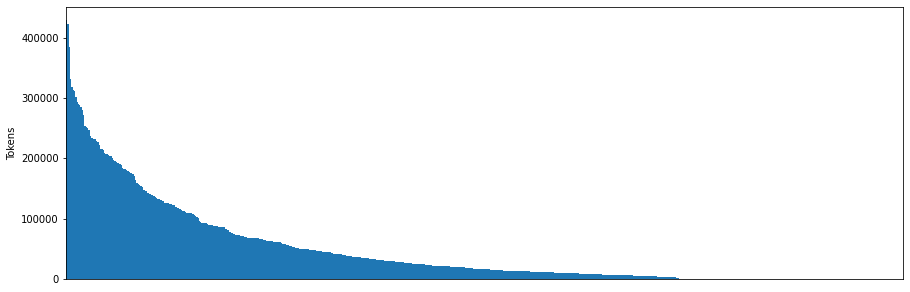

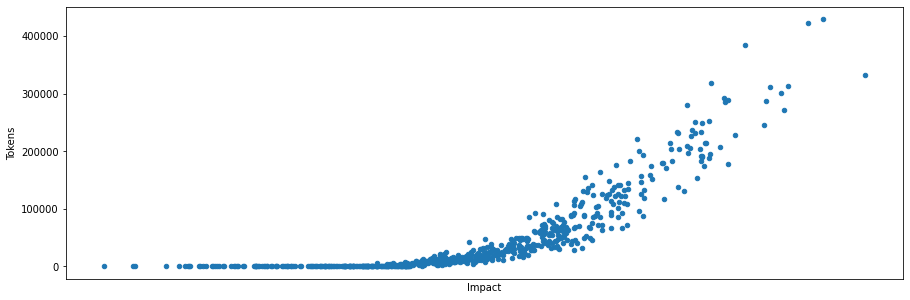

In [4]:
analyze_simulation(simulation, scoring_method='median', quorum=17, min_amount=1500)

## 1. What is the impact if a badgeholder deploys all of the 30M vs less than 30M?

scoring_method                    median
vote_quorum                           17
min_amount                          1500
num_projects_above_quorum            465
avg_payout                   64516.12914
median_payout                   32831.16
max_payout                     476724.86
dtype: object


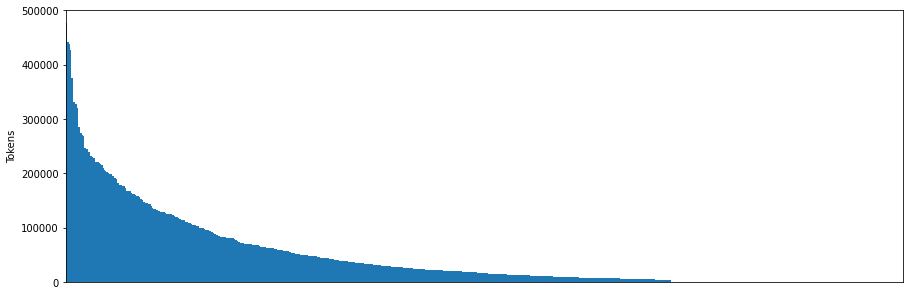

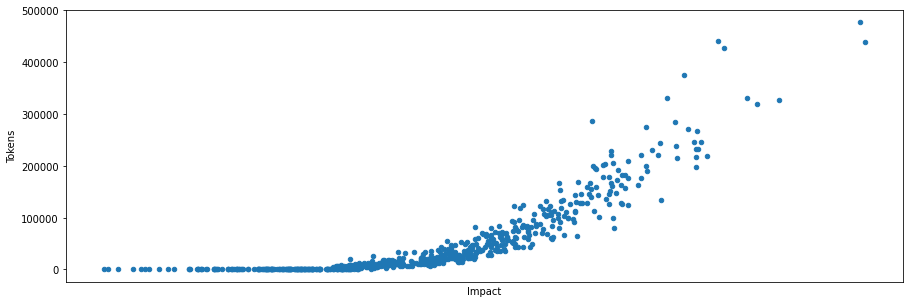

In [5]:
simulation_1A = Simulation()

simulation_1A.initialize_round(30_000_000)
simulation_1A.randomize_voters(
    num_voters=150, 
    willingness_to_spend=0.25, 
    laziness_factor=0.5, 
    expertise_factor=0.5
)
simulation_1A.randomize_projects(643)
simulation_1A.simulate_voting()
analyze_simulation(simulation_1A, scoring_method='median', quorum=17, min_amount=1500)

## Q1B: What if voters deploy less than 30M and are more selective?

scoring_method                      median
vote_quorum                             17
min_amount                            1500
num_projects_above_quorum              201
avg_payout                   149253.731443
median_payout                    103702.42
max_payout                       741922.08
dtype: object


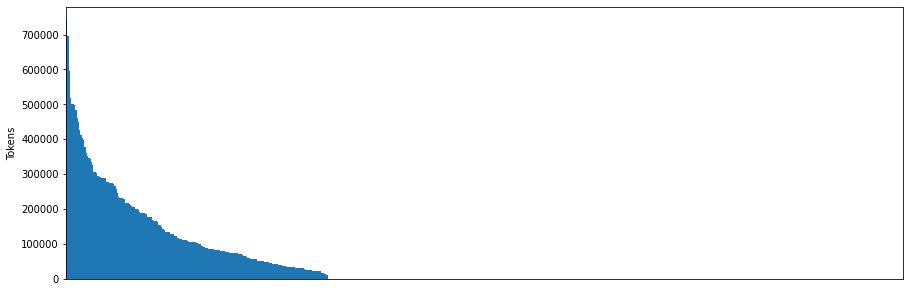

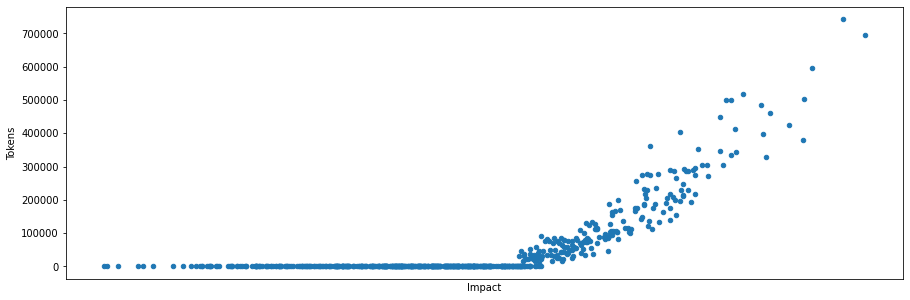

In [6]:
simulation_1B = Simulation()

simulation_1B.initialize_round(30_000_000)
simulation_1B.randomize_voters(
    num_voters=150, 
    willingness_to_spend=0.5, 
    laziness_factor=0.8, 
    expertise_factor=0.8
)
simulation_1B.randomize_projects(643)
simulation_1B.simulate_voting()
analyze_simulation(simulation_1B, scoring_method='median', quorum=17, min_amount=1500)

## Q2A: Does the number of projects reviewed affect the outcome?

<Axes: xlabel='num_votes', ylabel='token_amount'>

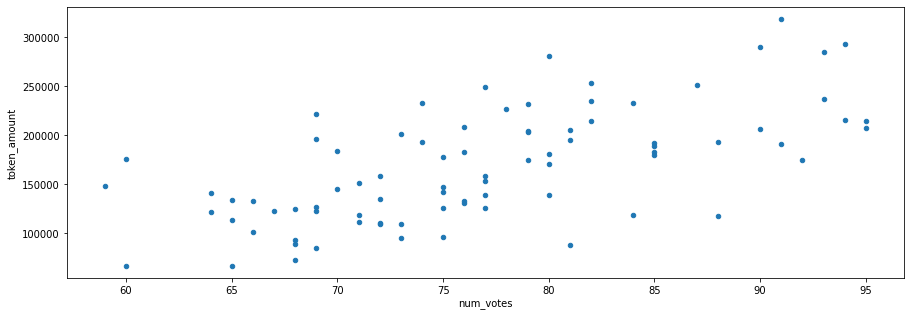

In [7]:
fig, ax = plt.subplots(figsize=(15,5))
df = pd.DataFrame(simulation.get_project_data())
df[df['rating'].between(4,5)].plot(kind='scatter', x='num_votes', y='token_amount', ax=ax)

## Q2B: What if badgeholders reviewed all projects?

scoring_method                     median
vote_quorum                            17
min_amount                           1500
num_projects_above_quorum             616
avg_payout                   48701.298636
median_payout                   38889.165
max_payout                      227830.69
dtype: object


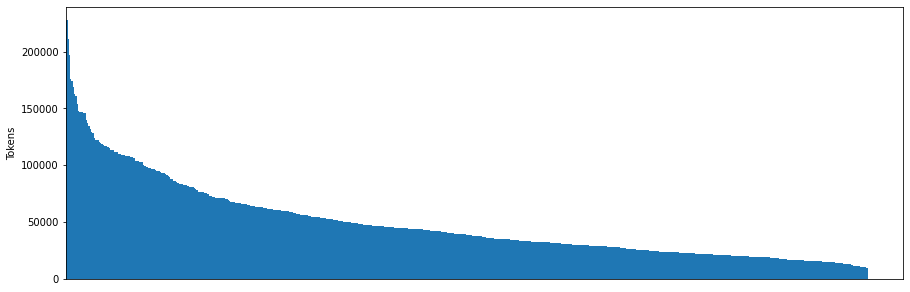

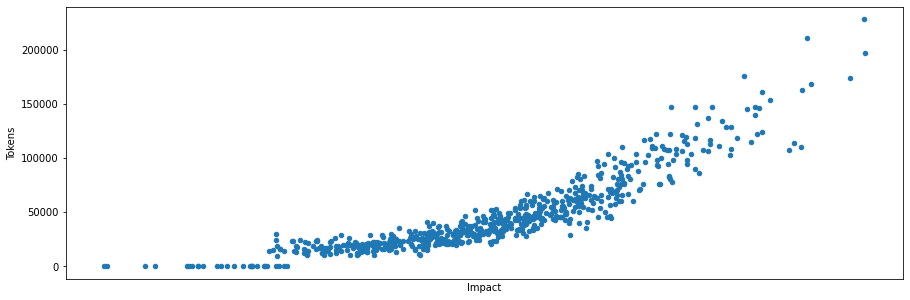

In [8]:
simulation_2B = Simulation()

simulation_2B.initialize_round(30_000_000)
simulation_2B.randomize_voters(
    num_voters=150, 
    willingness_to_spend=1, 
    laziness_factor=0.1, 
    expertise_factor=0.5
)
simulation_2B.randomize_projects(643)
simulation_2B.simulate_voting()
analyze_simulation(simulation_2B, scoring_method='median', quorum=17, min_amount=1500)

## 3. How does the normalization change before or after 1,500 minimum? (0-1,500 are ignored)

scoring_method                      median
vote_quorum                             17
min_amount                               1
num_projects_above_quorum              471
avg_payout                    71453.996156
median_payout                 36979.032536
max_payout                   481618.745963
dtype: object


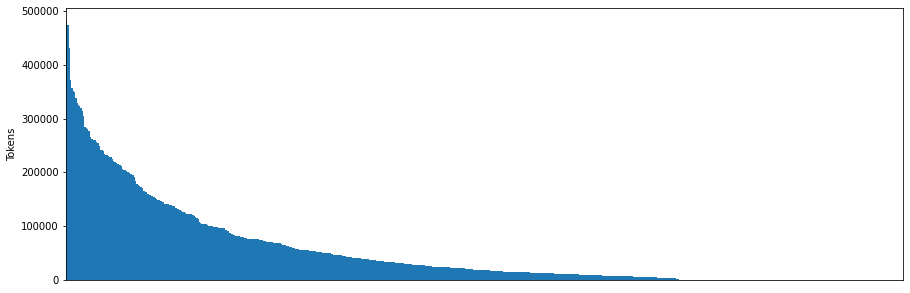

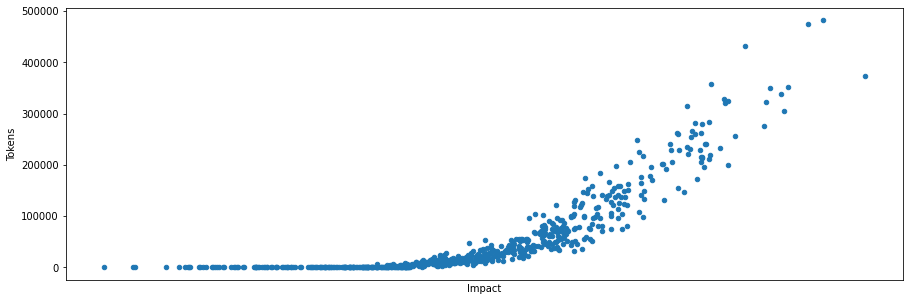

In [11]:
analyze_simulation(simulation, scoring_method='median', quorum=17, min_amount=1, normalize=False)

scoring_method                       mean
vote_quorum                            17
min_amount                           1500
num_projects_above_quorum             471
avg_payout                   63694.267728
median_payout                    37454.91
max_payout                      392842.87
dtype: object


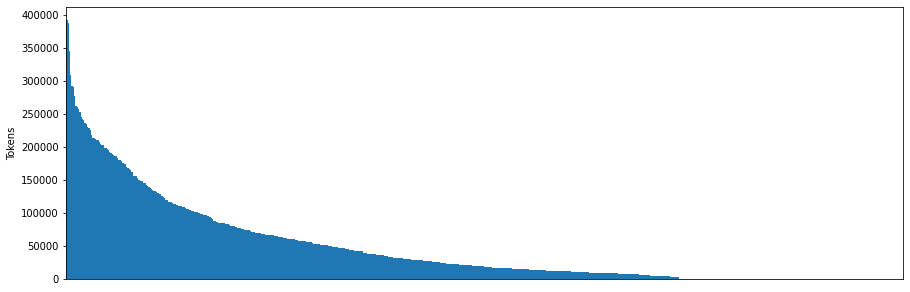

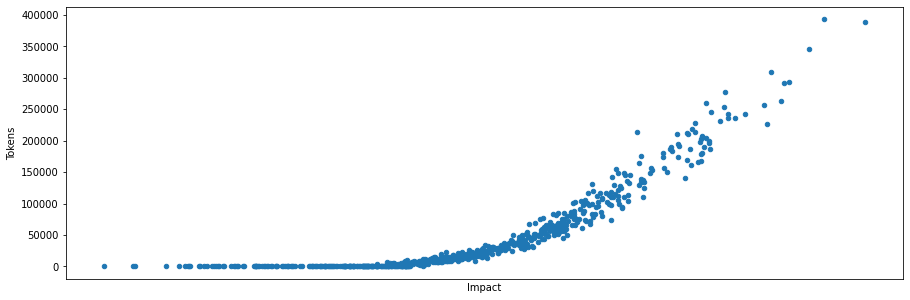

In [13]:
analyze_simulation(simulation, scoring_method='mean', quorum=17, min_amount=1500)

scoring_method                  quadratic
vote_quorum                            17
min_amount                              1
num_projects_above_quorum             471
avg_payout                   63694.267728
median_payout                     45713.7
max_payout                      308757.54
dtype: object


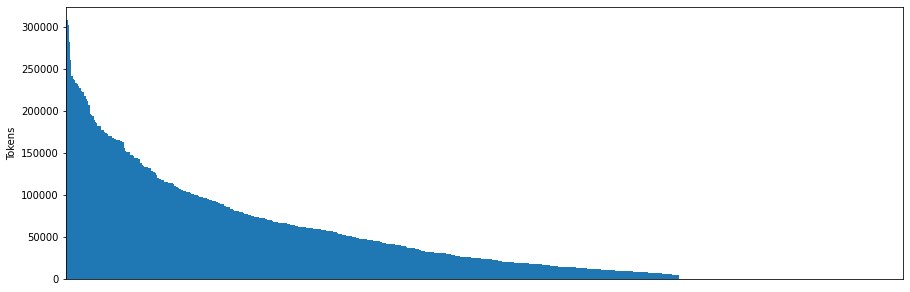

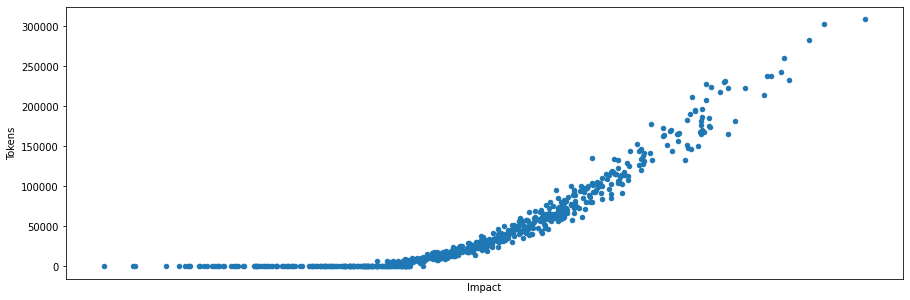

In [12]:
analyze_simulation(simulation, scoring_method='quadratic', quorum=17, min_amount=1)

## What is the impact of the normalization change before or after 1,500 minimum? (0-1,500 are ignored) 

scoring_method                     median
vote_quorum                            17
min_amount                              1
num_projects_above_quorum             471
avg_payout                   63694.267431
median_payout                     32963.2
max_payout                      429316.13
dtype: object


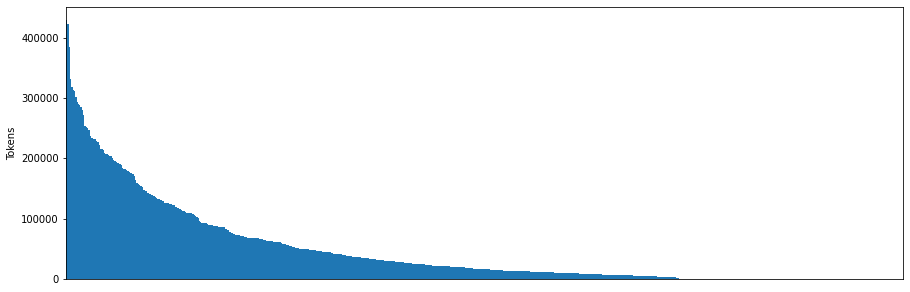

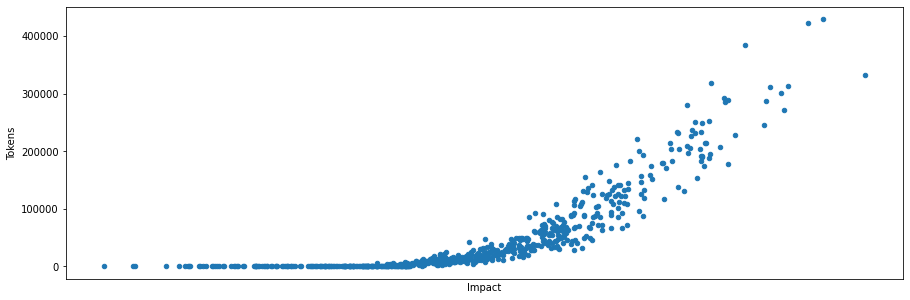

In [10]:
analyze_simulation(simulation, scoring_method='median', quorum=17, min_amount=1)

scoring_method                     median
vote_quorum                             1
min_amount                              1
num_projects_above_quorum             501
avg_payout                   59880.239441
median_payout                    24421.54
max_payout                      587272.95
dtype: object


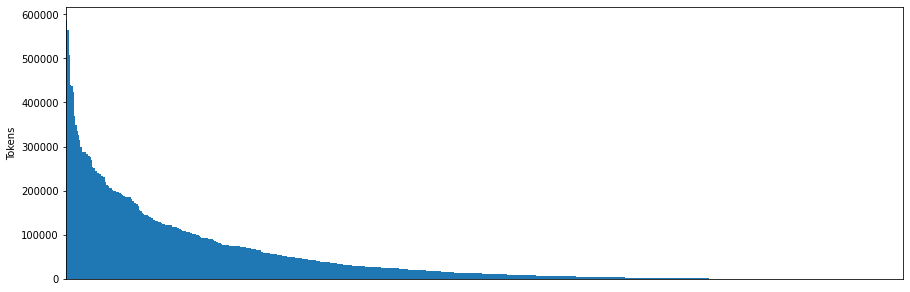

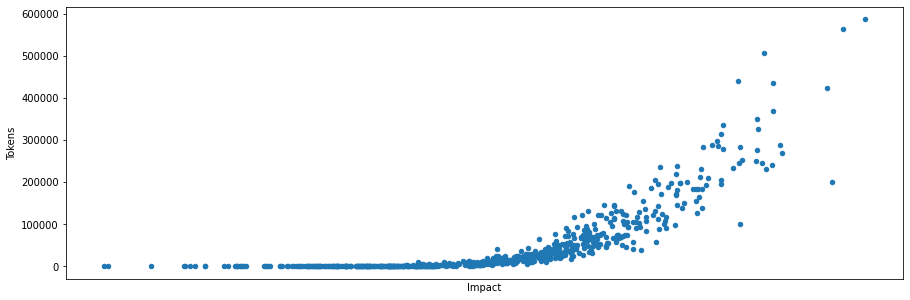

In [13]:
analyze_simulation(simulation, scoring_method='median', quorum=1, min_amount=1)

scoring_method                     median
vote_quorum                             1
min_amount                              1
num_projects_above_quorum             548
avg_payout                   54744.525748
median_payout                    7282.685
max_payout                       986881.0
dtype: object


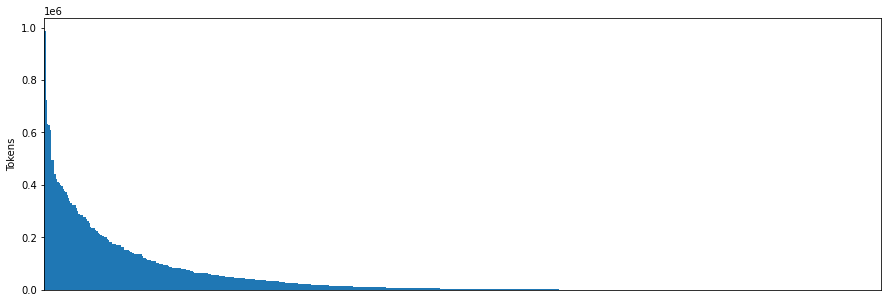

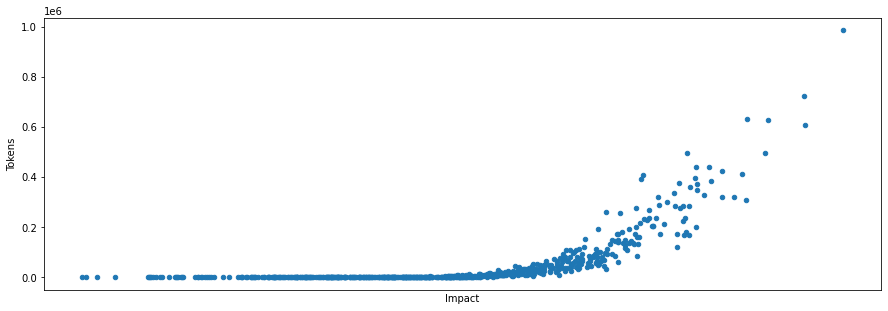

In [11]:
analyze_simulation(simulation, scoring_method='median', quorum=1, min_amount=1)

/var/folders/gh/1v87rt9j01gcjctn3v95bqkw0000gn/T/ipykernel_46082/1671737422.py:7: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
/var/folders/gh/1v87rt9j01gcjctn3v95bqkw0000gn/T/ipykernel_46082/1671737422.py:16: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


               mean   50%     max
num_votes        31    27     105
token_amount  46656  2995  929871


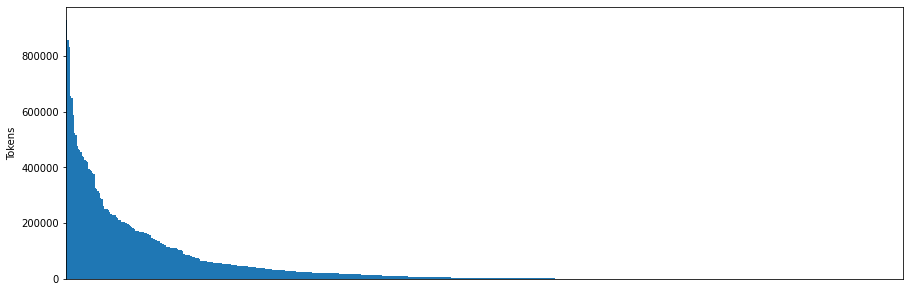

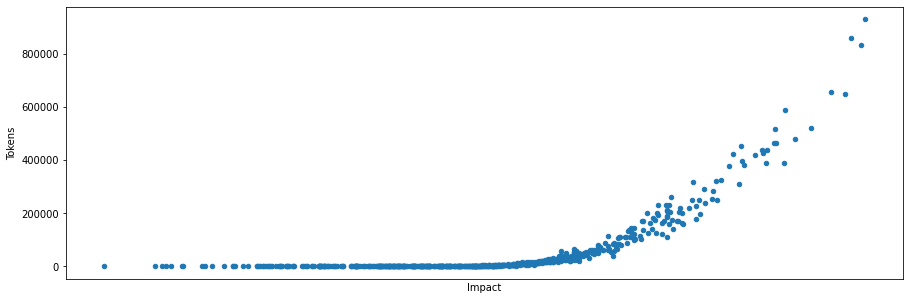

In [6]:
simulation.allocate_votes(scoring_method='median')
analyze_simulation(simulation)

/var/folders/gh/1v87rt9j01gcjctn3v95bqkw0000gn/T/ipykernel_46082/1671737422.py:7: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
/var/folders/gh/1v87rt9j01gcjctn3v95bqkw0000gn/T/ipykernel_46082/1671737422.py:16: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


               mean   50%     max
num_votes        31    27     105
token_amount  46656  2997  930355


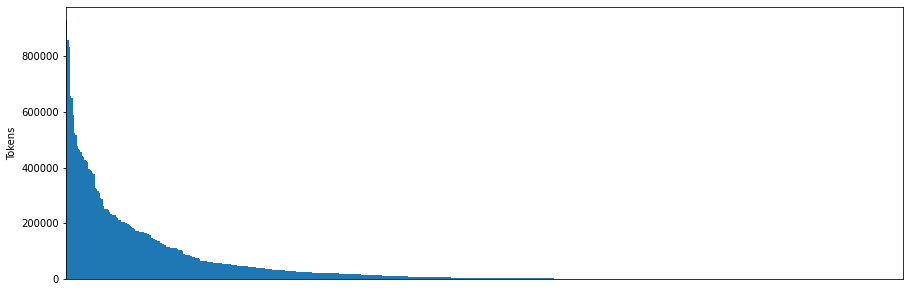

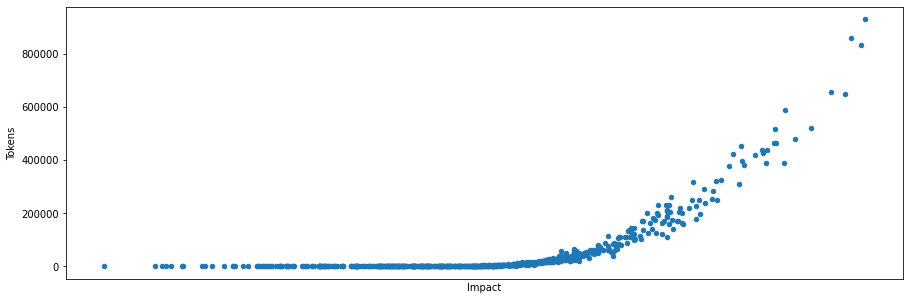

In [7]:
simulation.allocate_votes(scoring_method='median', quorum=17, min_amount=1500)
analyze_simulation(simulation)

In [ ]:
"QF": sum([np.sqrt(x) for x in votes])
"Median with Quorum": np.median(array) if np.median(array) >= min_amount and len(array) >= quorum else 0
"Mean with Quorum": np.mean(array) if np.mean(array) >= min_amount and len(array) >= quorum else 0
"Sum": sum(array)
    
    
if     

/var/folders/gh/1v87rt9j01gcjctn3v95bqkw0000gn/T/ipykernel_42646/1671737422.py:7: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
/var/folders/gh/1v87rt9j01gcjctn3v95bqkw0000gn/T/ipykernel_42646/1671737422.py:16: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


               mean   50%     max
num_votes        60    50     231
token_amount  46656  8993  757948


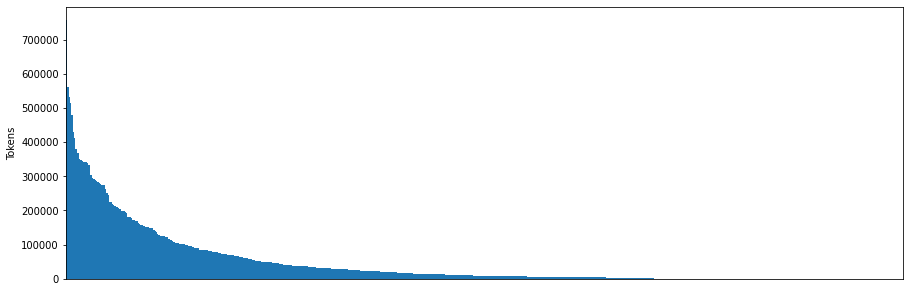

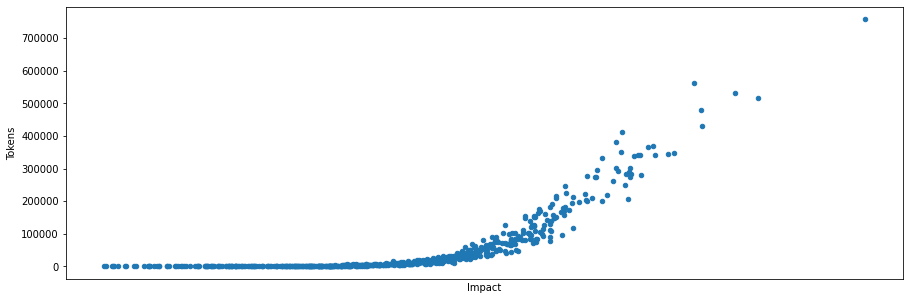

In [5]:
simulation.reset_round()
simulation.randomize_voters(
    num_voters=150, 
    willingness_to_spend=1, 
    laziness_factor=0.2, 
    expertise_factor=0.7
)
simulation.simulate_voting()
analyze_simulation(simulation)

/var/folders/gh/1v87rt9j01gcjctn3v95bqkw0000gn/T/ipykernel_42646/1671737422.py:7: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
/var/folders/gh/1v87rt9j01gcjctn3v95bqkw0000gn/T/ipykernel_42646/1671737422.py:16: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


               mean   50%     max
num_votes       113   106     343
token_amount  46656  4079  928969


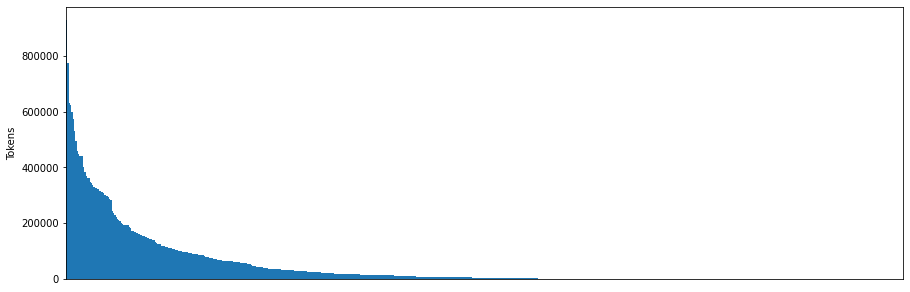

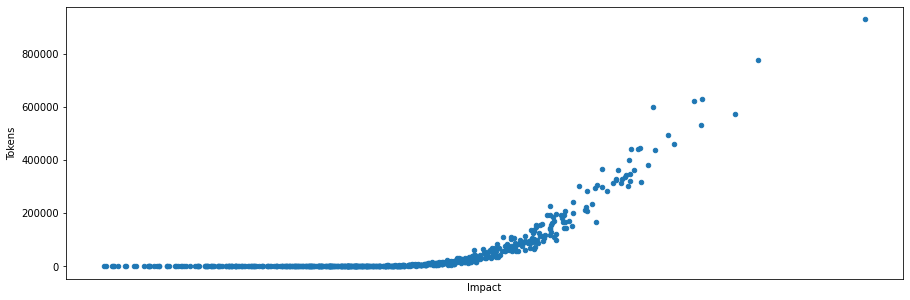

In [6]:
simulation.reset_round()
simulation.randomize_voters(
    num_voters=150, 
    willingness_to_spend=1, 
    laziness_factor=0.6, 
    expertise_factor=0.7
)
simulation.simulate_voting(abstains_are_zeroes=True)
analyze_simulation(simulation)

/var/folders/gh/1v87rt9j01gcjctn3v95bqkw0000gn/T/ipykernel_41459/1671737422.py:7: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
/var/folders/gh/1v87rt9j01gcjctn3v95bqkw0000gn/T/ipykernel_41459/1671737422.py:16: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


               mean    50%     max
num_votes       112     92     412
token_amount  46656  13781  408896


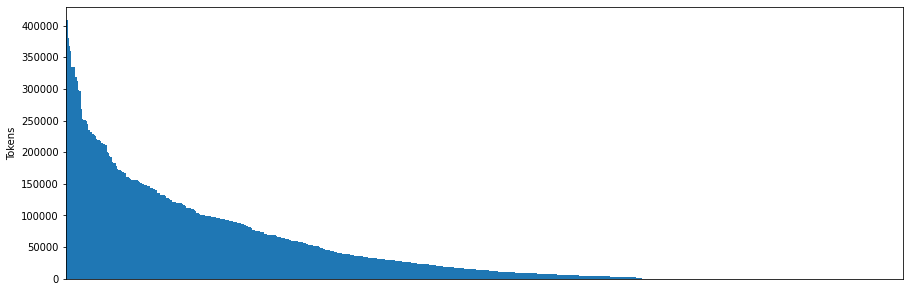

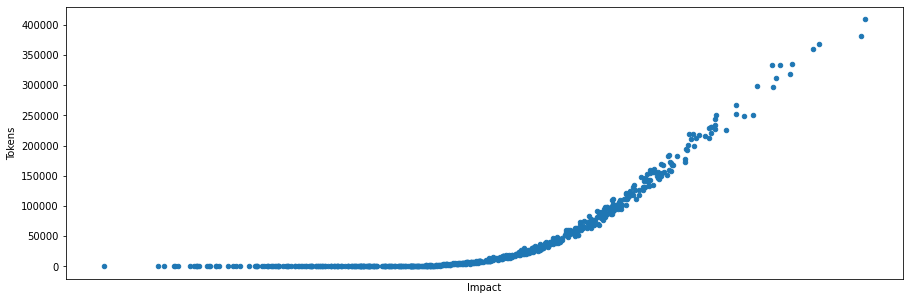

In [6]:
simulation.reset_round(scoring_method='QF')
simulation.randomize_voters(
    num_voters=150, 
    willingness_to_spend=1, 
    laziness_factor=0.6, 
    expertise_factor=0.7
)
simulation.simulate_voting()
analyze_simulation(simulation)

/var/folders/gh/1v87rt9j01gcjctn3v95bqkw0000gn/T/ipykernel_41459/1671737422.py:7: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
/var/folders/gh/1v87rt9j01gcjctn3v95bqkw0000gn/T/ipykernel_41459/1671737422.py:16: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


               mean    50%     max
num_votes       137    112     519
token_amount  46656  10562  431915


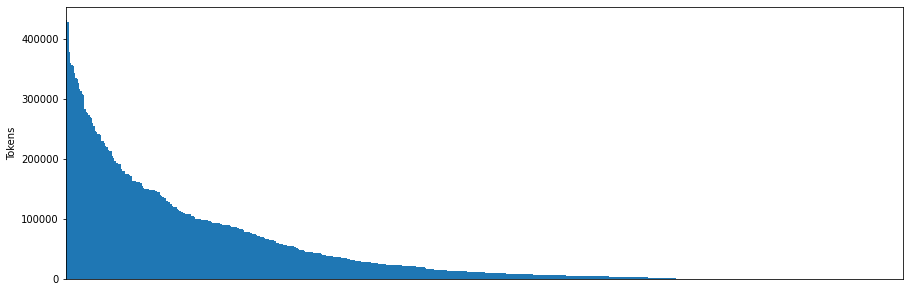

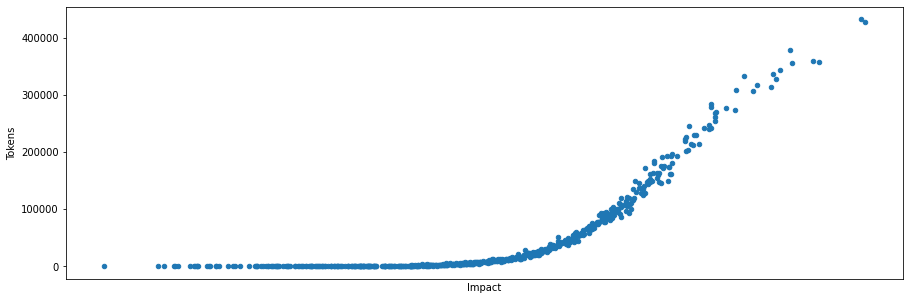

In [7]:
simulation.reset_round(scoring_method='mean')
simulation.randomize_voters(
    num_voters=150, 
    willingness_to_spend=1, 
    laziness_factor=0.6, 
    expertise_factor=0.7
)
simulation.simulate_voting()
analyze_simulation(simulation)